<p>
<img src="./imgs/EII-ULPGC-logo.jpeg" width="430px" align="right">

# **Detección de líneas**

## **Operador de Sobel**
https://es.wikipedia.org/wiki/Operador_Sobel

El **operador de Sobel** es una técnica utilizada en el procesamiento de imágenes, particularmente en el área de la detección de bordes. Es una aproximación discreta y diferencial que se utiliza para calcular la magnitud del gradiente de la intensidad de una imagen en cada punto. De esta manera, el operador de Sobel resalta regiones de alta variación espacial que suelen corresponder a bordes.

El operador de Sobel utiliza dos matrices de convolución $3 \times 3$ que se aplican a la imagen original para calcular aproximaciones de las derivadas, una para los cambios horizontales (ejes X) y otra para los cambios verticales (ejes Y). Estas matrices se conocen como kernels o filtros de Sobel.

El kernel para la dirección X es:

$$ G_x = \begin{bmatrix}-1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix} $$


Y el kernel para la dirección Y es:

$$ G_y = \begin{bmatrix}-1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix} $$

Al convolucionar la imagen con estos kernels, se obtiene dos imágenes que representan las derivadas horizontales (G_x) y verticales (G_y) de la imagen original. Estas derivadas se pueden combinar para encontrar la magnitud absoluta del gradiente en cada punto, usando la siguiente fórmula:

$$ G = \sqrt{G_x^2 + G_y^2} $$

La dirección del gradiente también se puede calcular para determinar la orientación de los bordes. Sin embargo, para muchas aplicaciones de detección de bordes, solo se utiliza la magnitud del gradiente.

El operador de Sobel es particularmente efectivo para el realce de bordes y la detección de cambios bruscos en la intensidad de una imagen.


In [ ]:
import cv2
import numpy as np
 
# Capture livestream video content from camera 0
# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture("imgs/carretera.mp4")
 
while(1):
 
    # Take each frame
    _, frame = cap.read()
    frame = cv2.resize(frame, (400, 300))
     
    # Convert to HSV for simpler calculations
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
     
    # Calculation of Sobelx
    sobel = cv2.Sobel(frame,cv2.CV_8U,1,1,ksize=3)
    # sobel = cv2.Sobel(frame,cv2.CV_8U,1,1,ksize=5)
    # sobel = cv2.Sobel(frame,cv2.CV_8U,1,1,ksize=7)
     
    cv2.imshow('original',frame) 
    cv2.imshow('sobel', sobel)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27: 
        break
 
cv2.destroyAllWindows()
 
#release the frame
cap.release()

Podemos apreciar algunos problemas con el operador de Sobel debido a que genera señal en cualquier zona donde haya un mínimo de gradiente (figura de abajo). Nos interesa tener un detector que nos proporcione únicamente el gradiente allí donde éste sea destacado e importante. Para ello, contamos con el detector de bordes de Canny.

<div align="center">
    <img src="imgs/Sobel_result01.jpg" width="30%">
</div>

## **Detector de bordes de Canny**
https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html


El Detector de Bordes de Canny es un algoritmo popular de procesamiento de imágenes para la detección eficaz de bordes. Las etapas principales del algoritmo son:

### **Paso 1: Conversión a Escala de Grises**

Antes de detectar los bordes, es necesario convertir la imagen a escala de grises porque el Detector de Canny trabaja con intensidades de píxeles.

### **Paso 2: Reducción de Ruido**

La detección de bordes es susceptible al ruido en la imagen. Canny utiliza un filtro Gaussiano para suavizar la imagen y reducir el ruido.

<div align="center">
    <img src="imgs/carreteras.jpg" width="80%">
</div>

### **Paso 3: Gradiente de Intensidad de la Imagen**

El Detector de Canny encuentra los bordes donde hay un cambio abrupto en la intensidad de los píxeles. Esto se hace utilizando operadores de bordes como Sobel para calcular el gradiente de la imagen en la dirección x e y.

### **Paso 4: Supresión de No Máximos**

Después de aplicar el filtro gaussiano y encontrar los gradientes de la imagen, cada píxel en la imagen de gradientes representa la magnitud del cambio de intensidad en esa ubicación. Sin embargo, si solo se utilizaran los valores de gradiente, los bordes detectados podrían ser más gruesos de lo deseado, lo que no es óptimo para la precisión. La supresión de no máximos aborda este problema.

**Proceso de Supresión de No Máximos:**
Comparación con Vecinos: Para cada píxel en la imagen de gradientes, el algoritmo de Canny compara la magnitud del gradiente de este píxel con las magnitudes de los gradientes en la dirección del gradiente (es decir, perpendicular a la dirección del borde, que es la dirección del máximo cambio de intensidad).

**Determinación de Máximos Locales:** Si la magnitud del gradiente de un píxel es mayor que la de sus vecinos en la dirección del gradiente, se considera un máximo local y se preserva. Este píxel es potencialmente parte de un borde.

**Eliminación de No Máximos:** Si la magnitud del gradiente de un píxel no es un máximo local (es decir, uno o ambos vecinos en la dirección del gradiente tienen magnitudes mayores), el valor de este píxel se suprime, estableciéndolo a cero (o lo hace "no máximo"). Esto efectivamente elimina al píxel de la consideración como parte de un borde.

El resultado de este proceso es una imagen donde los verdaderos bordes están destacados y son más nítidos, y los píxeles que no forman parte de un borde son descartados, produciendo bordes delgados y precisos, que son útiles para el procesamiento de imágenes subsecuente o análisis de visión por computadora.

Este proceso ayuda a evitar la detección errónea de bordes anchos y a mejorar la precisión global del algoritmo de Canny para la detección de bordes.

<div align="center">
    <img src="imgs/matriz.svg" width="30%">
</div>


In [13]:
import numpy as np

matriz=[[138,138,138,149,198],[138,138,149,198,214],[138,149,198,214,214],[149,198,214,214,214],[198,214,214,214,214]]
matriz=np.array(matriz)
print(matriz)

# Calcula soble en la matriz
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

res = np.zeros(matriz.shape)

for i in range(1, matriz.shape[0]-1):
    for j in range(1, matriz.shape[1]-1):
        region = matriz[i-1:i+2, j-1:j+2]
        gx = np.sum(sobel_x * region)
        gy = np.sum(sobel_y * region)
        res[i, j] = np.sqrt(gx**2 + gy**2)

print(res)

[[138 138 138 149 198]
 [138 138 149 198 214]
 [138 149 198 214 214]
 [149 198 214 214 214]
 [198 214 214 214 214]]
[[  0.           0.           0.           0.           0.        ]
 [  0.         115.96551211 277.18585823 291.32799385   0.        ]
 [  0.         277.18585823 291.32799385 137.17871555   0.        ]
 [  0.         291.32799385 137.17871555  22.627417     0.        ]
 [  0.           0.           0.           0.           0.        ]]



### **Paso 5: Binarización con Histéresis**

El algoritmo utiliza dos umbrales para detectar bordes fuertes y bordes débiles. Los bordes fuertes son trazados inmediatamente, mientras que los bordes débiles son rechazados a menos que estén conectados a bordes fuertes. Esto ayuda a mitigar el problema del ruido y la fragmentación de los bordes.


<div align="center">
    <img src="imgs/umbral_canny.svg" width="60%">
</div>

Bordes tipo A, donde los bordes son fuertes y se aceptan inmediatamente. Bordes tipo B, donde los bordes son débiles y se aceptan porque están conectados a bordes fuertes. Bordes tipo C, donde los bordes son rechazados. Bordes tipo D, donde los bordes son rechazados incondicionalmente.

In [ ]:
# OpenCV program to perform Edge detection in real time
# import libraries of python OpenCV
# where its functionality resides
import cv2

# np is an alias pointing to numpy library
import numpy as np


# capture frames from a camera
cap = cv2.VideoCapture("imgs/carretera.mp4")


# loop runs if capturing has been initialized
while(1):

	# reads frames from a camera
	ret, frame = cap.read()
	frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

	# Display an original image
	cv2.imshow('Original',frame)

	# finds edges in the input image and
	# marks them in the output map edges
	edges = cv2.Canny(frame,100,200)

	# Display edges in a frame
	cv2.imshow('Edges',edges)

	# Wait for Esc key to stop
	k = cv2.waitKey(5) & 0xFF
	if k == 27:
		break


# Close the window
cap.release()

# De-allocate any associated memory usage
cv2.destroyAllWindows()


<div align="center">
    <img src="imgs/canny.png" width="40%">
</div>

## **Detector de líneas de Hough**
https://learnopencv.com/hough-transform-with-opencv-c-python/
https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga8618180a5948286384e3b7ca02f6feeb

El **Detector de Líneas de Hough** es una técnica de procesamiento de imágenes y visión por computador para la detección de líneas rectas. Esta técnica es particularmente robusta para detectar líneas incluso cuando están rotas o un poco distorsionadas. Los pasos para la detección de líneas utilizando la transformada de Hough son:

### **Paso 1: Preprocesamiento de la Imagen**

Antes de aplicar la transformada de Hough para la detección de líneas, es común realizar algunos pasos de preprocesamiento en la imagen:

1. **Conversión a Escala de Grises:** Si la imagen es a color, se convierte a escala de grises.
2. **Detección de Bordes:** Se aplican operadores de detección de bordes como el de Sobel, Prewitt o Canny. Esto nos dará una imagen binaria donde los píxeles de los bordes están marcados.

### **Paso 2: Espacio de Hough**

Una línea en el espacio de la imagen puede representarse como `y = mx + b`, pero esta representación tiene problemas cuando se trata de líneas verticales. Por lo tanto, se usa la representación en forma de intersección de pendientes `ρ = x cos(θ) + y sin(θ)`, donde `ρ` es la distancia desde el origen hasta la línea más cercana a lo largo de un ángulo `θ` desde el eje x.

### **Paso 3: Acumulador**

Para cada píxel de borde en la imagen binaria y para cada ángulo `θ` posible (de unos previamente determinados), se calcula el valor correspondiente de `ρ` y se incrementa un contador en un acumulador bidimensional (un array donde los ejes son `θ` y `ρ`).

### **Paso 4: Umbralización**

Después de haber llenado el acumulador, se examina para encontrar los valores locales máximos. Se establece un umbral para decidir qué valores en el acumulador representan líneas. Esto se hace porque no todos los valores máximos corresponden a líneas reales en la imagen, algunos pueden ser causados por ruido o por otras irregularidades.

### **Paso 5: Extracción de Líneas**

Los valores de `ρ` y `θ` que superan el umbral son los que representan las líneas en la imagen. Con estos parámetros, se pueden trazar líneas en la imagen original para visualizar las líneas detectadas.

### **Paso 6: Post-Procesamiento**

En algunos casos, puede haber múltiples detecciones de la misma línea debido al ruido. Un paso de post-procesamiento puede involucrar la fusión de líneas que son muy cercanas entre sí y que tienen ángulos similares.

True

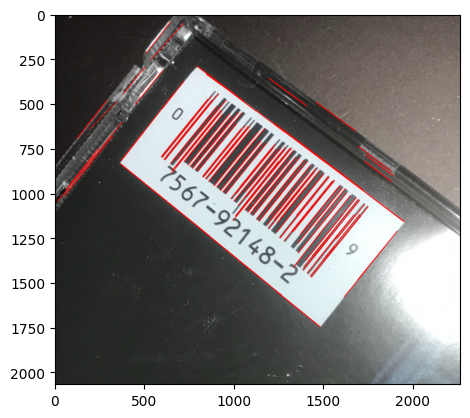

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image 
#img = cv2.imread('imgs/barcode02.png', cv2.IMREAD_COLOR    )
img = cv2.imread('barcode03.png', cv2.IMREAD_COLOR)

# Convert the image to gray-scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the edges in the image using canny detector
edges = cv2.Canny(gray, 50, 200)
#plt.imshow(edges, cmap='gray')

# Detect points that form a line
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=150, maxLineGap=10)

# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)

# Show result
plt.imshow(img)
cv2.imwrite('barcode03_lines.png', img)

Si quisiéramos rotar la imagen para dejar las líneas del código de barras completamente verticales u horizontales, deberíamos calcular cuál es la pendiente o ángulo de inclinación de las líneas. Para ello, vamos a extraer la media de todas las pendientes y, luego, dado que asumimos que la mayoría de líneas extraídas van a corresponder con el código de barras, extraeremos la media de las pendientes más parecidas a la media.

In [2]:
img = cv2.imread('barcode03.png', cv2.IMREAD_COLOR)

# Extract mean slope of lines
slopes = []
for line in lines:
    x1, y1, x2, y2 = line[0]
    slopes.append((y2-y1)/(x2-x1))

mean_slope = np.mean(slopes)

# Convert to degrees
mean_angle = np.rad2deg(np.arctan(mean_slope))
print("Ángulo promedio total: ", mean_angle)
 
# Extract only lines with slope within 10 degrees of the mean
filtered_lines = []
for line in lines:
    x1, y1, x2, y2 = line[0]
    slope = (y2-y1)/(x2-x1)
    angle = np.rad2deg(np.arctan(slope))
    if abs(angle - mean_angle) < 10:
        filtered_lines.append(line)

# Extract mean slope of filtered lines
slopes = []
for line in filtered_lines:
    x1, y1, x2, y2 = line[0]
    slopes.append((y2-y1)/(x2-x1))
mean_slope = np.mean(slopes)

# Convert to degrees
mean_angle = np.rad2deg(np.arctan(mean_slope))
print("Ángulo promedio de las líneas del código de barras: ", mean_angle)




Ángulo promedio total:  -42.487866443703034
Ángulo promedio de las líneas del código de barras:  -50.99409403516252


## **Rotar imágenes**

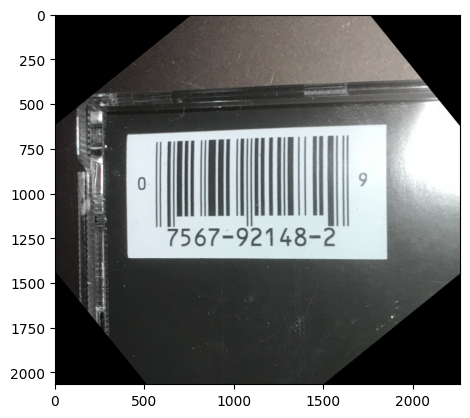

In [3]:
# Rotate image
img = cv2.imread('barcode03.png', cv2.IMREAD_COLOR)
rows, cols, _ = img.shape
M = cv2.getRotationMatrix2D((cols/2, rows/2), -50.99 +90, 1)
dst = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(dst)


## **Algoritmo del detector de líneas de Hough**

El algorimto del detector de líneas de Hough, si lo quisiéramos implementar, sería el siguiente:

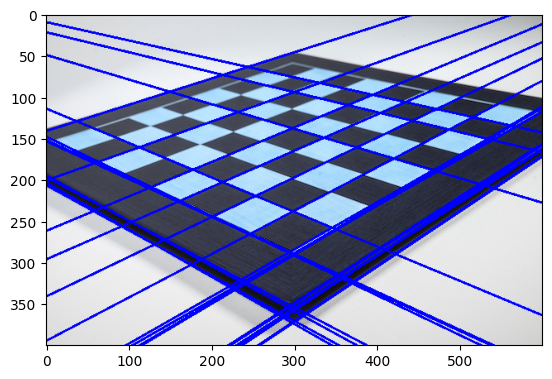

In [ ]:
import cv2
import numpy as np

# Load image
image = cv2.imread('imgs/chess02_small.png', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 50, 200)

# Plot edges
plt.imshow(edges, cmap='gray')


# Hough algorithm
accumulator = []

# Parameters
theta_res = 1
theta_max = 180
theta_min = 0
theta_range = theta_max - theta_min
theta = np.linspace(theta_min, theta_max, int(theta_range/theta_res))

rho_res = 1
rho_max = np.sqrt(image.shape[0]**2 + image.shape[1]**2)
rho_min = 0
rho_range = rho_max - rho_min
rho = np.linspace(rho_min, rho_max, int(rho_range/rho_res))

# Create accumulator
for i in range(len(theta)):
    accumulator.append([])
    for j in range(len(rho)):
        accumulator[i].append(0)

# Find non-zero pixels
non_zero = np.nonzero(edges)

# Accumulator
for i, _ in enumerate(non_zero[0]):
    for j, _ in enumerate(theta):
        rho_val = non_zero[1][i]*np.cos(np.deg2rad(theta[j])) + non_zero[0][i]*np.sin(np.deg2rad(theta[j]))
        rho_val = int(np.round(rho_val))
        accumulator[j][rho_val] += 1

# Find peaks
peaks = []
for i, _ in enumerate(accumulator):
    for j, _ in enumerate(accumulator[i]):
        if accumulator[i][j] > 150:
            peaks.append((i, j))


# Draw lines
for peak in peaks:
    theta_val = theta[peak[0]]
    rho_val = rho[peak[1]]
    a = np.cos(np.deg2rad(theta_val))
    b = np.sin(np.deg2rad(theta_val))
    x0 = a*rho_val
    y0 = b*rho_val
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Show image
plt.imshow(image)



-----

### **Ejercicio**

Además del detector de líneas de Hough, también existe el detector de círculos de Hough, que es una extensión del anterior. El algoritmo es similar, pero en lugar de buscar líneas rectas, busca círculos en la imagen. Busca en la documentación de OpenCV cómo se utiliza este detector y aplícalo a la imagen `monedas.jpg` para detectar las monedas que aparecen en la imagen. Ajusta los parámetros del detector para que detecte todas las monedas y no detecte falsos positivos. Ten muy en cuenta los parámetros llamados `param1` y `param2` que son los umbrales del detector. Establécelos correctamente y describe lo que hacen.